**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex1 import *

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [2]:
import pandas as pd

red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


You can get the number of rows and columns of a dataframe (or a Numpy array) with the `shape` attribute.

In [3]:
red_wine.shape # (rows, columns)

(1599, 12)

# 1) Input shape #

How well can we predict a wine's perceived quality from the physiochemical measurements?  

The target is `'quality'`, and the remaining columns are the features.  How would you set the `input_shape` parameter for a Keras model on this task?

In [4]:
# YOUR CODE HERE
input_shape = [11]

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [5]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(units=1,input_shape=[11])
])

# Check your answer
q_2.check()

2022-08-23 17:52:12.781215: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
# Lines below will give you a hint or solution code
#q_2.hint()
#q_2.solution()

# 3) Look at the weights

Internally, Keras represents the weights of a neural network with **tensors**. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with [GPU](https://www.kaggle.com/docs/efficient-gpu-usage) and [TPU](https://www.kaggle.com/docs/tpu)) accelerators. TPUs, in fact, are designed specifically for tensor computations.

A model's weights are kept in its `weights` attribute as a list of tensors. Get the weights of the model you defined above. (If you want, you could display the weights with something like: `print("Weights\n{}\n\nBias\n{}".format(w, b))`).

In [8]:
# YOUR CODE HERE
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

# Check your answer
q_3.check()

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.06693614],
       [-0.23121238],
       [-0.22346091],
       [-0.34062847],
       [ 0.6437275 ],
       [ 0.6781675 ],
       [-0.48832786],
       [-0.27677548],
       [ 0.09110379],
       [ 0.1551832 ],
       [ 0.04760033]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> Do you see how there's one weight for each input (and a bias)? Notice though that there doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to 0.0). A neural network learns by finding better values for its weights.


In [9]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

(By the way, Keras represents weights as tensors, but also uses tensors to represent data. When you set the `input_shape` argument, you are telling Keras the dimensions of the array it should expect for each example in the training data. Setting `input_shape=[3]` would create a network accepting vectors of length 3, like `[0.2, 0.4, 0.6]`.)
 

# Optional: Plot the output of an untrained linear model
 
The kinds of problems we'll work on through Lesson 5 will be *regression* problems, where the goal is to predict some numeric target. Regression problems are like "curve-fitting" problems: we're trying to find a curve that best fits the data. Let's take a look at the "curve" produced by a linear model. (You've probably guessed that it's a line!)
 
We mentioned that before training a model's weights are set randomly. Run the cell below a few times to see the different lines produced with a random initialization. (There's no coding for this exercise -- it's just a demonstration.)

2022-08-23 17:52:13.031790: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


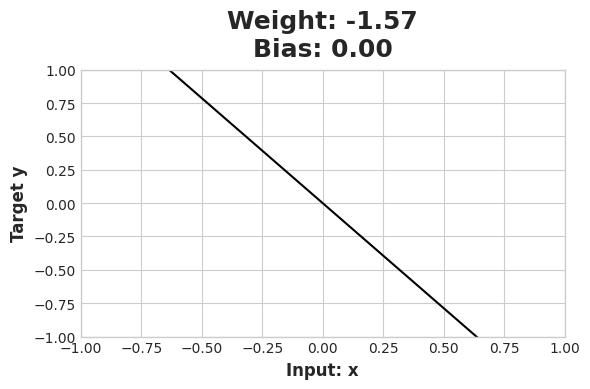

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# Keep Going #

Add hidden layers and [**make your models deep**](https://www.kaggle.com/ryanholbrook/deep-neural-networks) in Lesson 2.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-deep-learning/discussion) to chat with other learners.*